## 基于线性回归对Titanic号存活进行预测
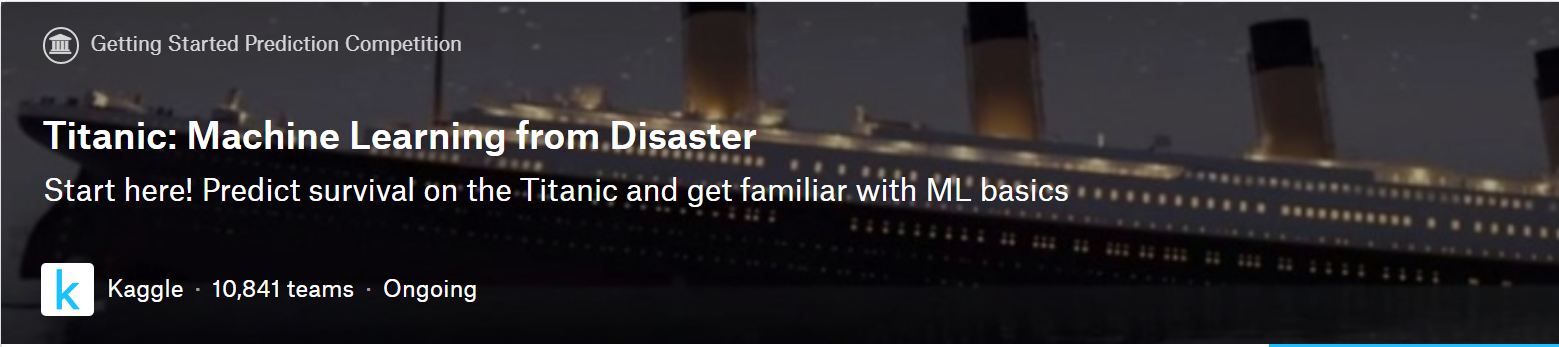

1、数据EDA

2、数据清洗

3、特征工程

4、模型的构建

5、测试

6、提交验证

## 导入必要的库

In [5]:
import pandas as pd#导入数据文件
import numpy as np#科学计算计算库
import seaborn as sns
import matplotlib.pyplot as plt#数据可视化库
import warnings
import pandas_profiling as ppf#eda
from sklearn.preprocessing import LabelEncoder#标签编码
from sklearn.preprocessing import MinMaxScaler#归一化
from sklearn.model_selection import train_test_split#数据集的划分
from sklearn.linear_model import LinearRegression#算法
from sklearn.metrics import mean_absolute_error#评估函数

观察一下数据

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

•PassengerID（ID）

•Survived(存活与否)

•Pclass（客舱等级，较为重要）

•Name（姓名，可提取出更多信息）

•Sex（性别，较为重要）

•Age（年龄，较为重要）

•Parch（直系亲友）

•SibSp（旁系）

•Ticket（票编号）

•Fare（票价）

•Cabin（客舱编号）

•Embarked（上船的港口编号）


In [4]:
train.head(10)#显示数据文件的前五行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()#看数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 数据的EDA

In [11]:
ppf.ProfileReport(train)##从这里要看到问题

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


## 首先就是缺失值的处理

In [6]:
train["Age"] = train["Age"].fillna(np.mean(train["Age"]))#填充年龄这一列的缺失值
test["Age"] = test["Age"].fillna(np.mean(test["Age"]))#同步进行

train.drop("Cabin",axis=1,inplace=True)#删除cabin这一列然后在替代

In [7]:
test.drop("Cabin",axis=1,inplace=True)

In [9]:
train["Age"].isnull().sum()#空值的个数为0

0

In [10]:
test["Age"].isnull().sum()#空值的个数为0

0

## 删除没必要的列

In [11]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [12]:
train.drop("Ticket",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)
train.drop("Embarked",axis=1,inplace=True)
test.drop("Embarked",axis=1,inplace=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [14]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


## 编码--将字符串做成数值型

In [15]:
lab = LabelEncoder()

In [16]:
train["Sex"] = lab.fit_transform(train["Sex"])#对sex列进行数值化

In [17]:
test["Sex"] = lab.fit_transform(test["Sex"])

In [18]:
minmax = MinMaxScaler()#实例化函数

In [22]:
train["Age"] = minmax.fit_transform(np.array(train["Age"]).reshape(-1,1))#归一化，是对大数值进行一个放大缩小的问题

In [23]:
test["Age"] = minmax.fit_transform(np.array(test["Age"]).reshape(-1,1))

In [26]:
train["Age"].min()

0.0

## 查看改变之后的数据

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,0.452723,0,0,7.8292
1,893,3,0,0.617566,1,0,7.0000
2,894,2,1,0.815377,0,0,9.6875
3,895,3,1,0.353818,0,0,8.6625
4,896,3,0,0.287881,1,1,12.2875


## 对数据进行处理

In [30]:
minmax = MinMaxScaler()
train["Fare"] = minmax.fit_transform(np.array(train["Fare"]).reshape(-1,1))

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [33]:
PassengerId = test.PassengerId

In [34]:
test["Fare"] = test["Fare"].fillna(np.mean(test["Fare"]))

In [35]:
test["Fare"] = minmax.fit_transform(np.array(test["Fare"]).reshape(-1,1))

## 数据处理完之后就是建模测试再就是生成文件提交


## 划分数据集--训练集和测试集

In [36]:
x = train.drop("Survived",axis=1)

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


In [39]:
y = train["Survived"]

In [40]:
y.shape

(891,)

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)#划分数据集，大家要明白高考模拟题

In [42]:
x_train.shape,y_train.shape#检查一下shape

((712, 7), (712,))

## 使用sklearn来搭建模型-训练

In [44]:
lin = LinearRegression()#实例化算法

In [45]:
lin.fit(x_train,y_train)#对训练集进行拟合

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
y_pred = lin.predict(x_test)#对自己划分的数据集进行测试，得到的预测值

In [47]:
mae = mean_absolute_error(y_pred,y_test)#先不处理
mae

0.288637827730026

In [48]:
predict = lin.predict(test)#真正高考

In [49]:
predict##Survived的值

array([ 7.35589590e-02,  4.56644447e-01,  5.26553673e-02,  1.23403756e-01,
        6.09283860e-01,  2.09489138e-01,  6.17965543e-01,  2.34385415e-01,
        6.97085526e-01,  7.11860677e-02,  1.01461193e-01,  3.24491487e-01,
        9.63395008e-01,  3.27300316e-03,  7.96963765e-01,  7.76344389e-01,
        2.31954408e-01,  1.62435557e-01,  5.89034070e-01,  5.18648751e-01,
        2.28636071e-01,  2.25701596e-01,  9.45240586e-01,  4.88301640e-01,
        8.21860965e-01, -7.52854279e-02,  9.96685489e-01,  1.52474176e-01,
        3.59114511e-01,  8.90169368e-03,  8.90715169e-02,  2.14088723e-01,
        5.25074773e-01,  5.44160265e-01,  3.93114345e-01,  1.78861034e-01,
        6.16167124e-01,  6.77650730e-01,  1.36749067e-01,  1.19428212e-01,
        3.12246604e-02,  4.28447068e-01,  3.04075863e-02,  7.79873083e-01,
        8.06809107e-01,  1.36125945e-01,  3.32297215e-01,  1.01216445e-01,
        7.65337575e-01,  5.52224614e-01,  4.33510415e-01,  2.85627454e-01,
        7.37539379e-01,  

In [50]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predict})#以字典的形式来建立dataframe

In [51]:
submission.to_csv("submission.csv",index=False)#转换成csv文件

In [52]:
pd.read_csv("submission.csv")#提交文件要科学上网

,PassengerId,Survived
0,892,0.073559
1,893,0.456644
2,894,0.052655
3,895,0.123404
4,896,0.609284
5,897,0.209489
6,898,0.617966
7,899,0.234385
8,900,0.697086
9,901,0.071186
